In [1]:
pip install git+https://github.com/dbouget/raidionics_rads_lib.git

  Cloning https://github.com/dbouget/raidionics_rads_lib.git to /home/dbouget/.tmp/pip-req-build-t8oxv4un
  Running command git clone --filter=blob:none --quiet https://github.com/dbouget/raidionics_rads_lib.git /home/dbouget/.tmp/pip-req-build-t8oxv4un
  Resolved https://github.com/dbouget/raidionics_rads_lib.git to commit 005b837b770c88aefa8adda762c8c311a73d9820
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/dbouget/raidionics_seg_lib.git (to revision master) to /home/dbouget/.tmp/pip-install-qhlxzy1t/raidionicsseg_f9272f6bacb54abb81e0e06ce7cf82c1
  Running command git clone --filter=blob:none --quiet https://github.com/dbouget/raidionics_seg_lib.git /home/dbouget/.tmp/pip-install-qhlxzy1t/raidionicsseg_f9272f6bacb54abb81e0e06ce7cf82c1
  Resolved https://github.com/dbouget/raidionics_seg_lib.git to commit 49a3274f2aa2b07fa81369e8bdaf3747c003f4ae
  Preparing metadata (setup.py) ... done
Note: you may n

In [2]:
#Download the test data
import os
import requests
import zipfile

test_patient_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Samples-RaidionicsRADSLib-UnitTest2.zip'
brain_model_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Raidionics-MRI_Brain-ONNX-v12.zip'
gbm_preop_model_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Raidionics-MRI_GBM-ONNX-v12.zip'
gbm_postop_model_url = 'https://github.com/raidionics/Raidionics-models/releases/download/1.2.0/Raidionics-MRI_GBM_Postop_FV_5p-ONNX_v12.zip'

test_dir = os.path.join(os.getcwd(), 'unit_tests_results_dir')
os.makedirs(test_dir, exist_ok=True)
patient_dir = os.path.join(test_dir, 'patients')
models_dir = os.path.join(test_dir, 'models')
results_dir = os.path.join(test_dir, 'results')
os.makedirs(patient_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

archive_dl_dest = os.path.join(test_dir, 'inference_patient.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(test_patient_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(patient_dir)
           
archive_dl_dest = os.path.join(test_dir, 'brain-model.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(brain_model_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(models_dir)
    
archive_dl_dest = os.path.join(test_dir, 'gbm_preop-model.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(gbm_preop_model_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(models_dir)

archive_dl_dest = os.path.join(test_dir, 'gbm_postop-model.zip')
if not os.path.exists(archive_dl_dest):
    headers = {}
    response = requests.get(gbm_postop_model_url, headers=headers, stream=True)
    response.raise_for_status()
    if response.status_code == requests.codes.ok:
        with open(archive_dl_dest, "wb") as f:
            for chunk in response.iter_content(chunk_size=1048576):
                f.write(chunk)
    with zipfile.ZipFile(archive_dl_dest, 'r') as zip_ref:
        zip_ref.extractall(models_dir)

assert(os.path.exists(os.path.join(models_dir, 'MRI_Brain')))
assert(os.path.exists(os.path.join(models_dir, 'MRI_GBM')))
assert(os.path.exists(os.path.join(models_dir, 'MRI_GBM_Postop_FV_5p')))
assert(os.path.exists(os.path.join(patient_dir, 'patient-UnitTest2')))

In [5]:
# Prepare the configuration file
import configparser
import json
import logging

logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

# For inputs already preprocessed with skull-stripping, the following boolean must be set to True
using_skull_stripped_inputs = True

# For inputs already preprocessed with co-registration (assuming the T1-CE postop MR scan as reference), the following boolean must be set to True
using_co_registered_inputs = False

rads_config = configparser.ConfigParser()
rads_config.add_section('Default')
rads_config.set('Default', 'task', 'neuro_diagnosis')
rads_config.set('Default', 'caller', '')
rads_config.add_section('System')
rads_config.set('System', 'gpu_id', "-1")
rads_config.set('System', 'input_folder', os.path.join(patient_dir, 'patient-UnitTest2'))
rads_config.set('System', 'output_folder', results_dir)
rads_config.set('System', 'model_folder', models_dir)
rads_config.set('System', 'pipeline_filename', os.path.join(test_dir, 'postop_reporting_pipeline.json'))
rads_config.add_section('Runtime')
rads_config.set('Runtime', 'reconstruction_method', 'probabilities')
rads_config.set('Runtime', 'reconstruction_order', 'resample_first')
rads_config.set('Runtime', 'use_stripped_data', 'True' if using_skull_stripped_inputs else 'False')
rads_config.set('Runtime', 'use_registered_data', 'True' if using_co_registered_inputs else 'False')
rads_config.add_section('Neuro')
# The cortical features can be computed from the following atlases: [MNI, Schaefer7, Schaefer17, Harvard-Oxford]
rads_config.set('Neuro', 'cortical_features', 'MNI, Schaefer17')
rads_config_filename = os.path.join(results_dir, 'rads_config.ini')
with open(rads_config_filename, 'w') as outfile:
    rads_config.write(outfile)

# Prepare the underlying pipeline
pipeline_json = {}
step_index = 1
step_str = str(step_index)
if not using_skull_stripped_inputs:
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Segmentation"
    pipeline_json[step_str]["inputs"] = {}
    pipeline_json[step_str]["inputs"]["0"] = {}
    pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 0
    pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["inputs"]["0"]["labels"] = None
    pipeline_json[step_str]["inputs"]["0"]["space"] = {}
    pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 0
    pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["target"] = "Brain"
    pipeline_json[step_str]["model"] = "MRI_Brain"
    pipeline_json[step_str]["format"] = "thresholding"
    pipeline_json[step_str]["description"] = "Brain segmentation in T1-CE (T0)."
    step_index = step_index + 1
    
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Segmentation"
pipeline_json[step_str]["inputs"] = {}
pipeline_json[step_str]["inputs"]["0"] = {}
pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["0"]["labels"] = None
pipeline_json[step_str]["inputs"]["0"]["space"] = {}
pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["target"] = "Tumor"
pipeline_json[step_str]["model"] = "MRI_GBM"
pipeline_json[step_str]["format"] = "thresholding"
pipeline_json[step_str]["description"] = "Tumor segmentation in T1-CE (T0)."

if not using_skull_stripped_inputs:
    step_index = step_index + 1
    step_str = str(step_index)
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Segmentation"
    pipeline_json[step_str]["inputs"] = {}
    pipeline_json[step_str]["inputs"]["0"] = {}
    pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 1
    pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["inputs"]["0"]["labels"] = None
    pipeline_json[step_str]["inputs"]["0"]["space"] = {}
    pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 1
    pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["target"] = "Brain"
    pipeline_json[step_str]["model"] = "MRI_Brain"
    pipeline_json[step_str]["format"] = "thresholding"
    pipeline_json[step_str]["description"] = "Brain segmentation in T1-CE (T1)."

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Registration"
pipeline_json[step_str]["moving"] = {}
pipeline_json[step_str]["moving"]["timestamp"] = 0
pipeline_json[step_str]["moving"]["sequence"] = "T1-CE"
pipeline_json[step_str]["fixed"] = {}
pipeline_json[step_str]["fixed"]["timestamp"] = 1
pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
pipeline_json[step_str]["description"] = "Registration from T1-CE (T0) to T1-CE (T1)"

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Apply registration"
pipeline_json[step_str]["moving"] = {}
pipeline_json[step_str]["moving"]["timestamp"] = 0
pipeline_json[step_str]["moving"]["sequence"] = "T1-CE"
pipeline_json[step_str]["fixed"] = {}
pipeline_json[step_str]["fixed"]["timestamp"] = 1
pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
pipeline_json[step_str]["direction"] = "forward"
pipeline_json[step_str]["description"] = "Apply registration from T1-CE (T0) to T1-CE (T1)"

additional_postop_sequences = ['T1-w', 'FLAIR']
for seq in additional_postop_sequences:
    if not using_skull_stripped_inputs:
        step_index = step_index + 1
        step_str = str(step_index)
        pipeline_json[step_str] = {}
        pipeline_json[step_str]["task"] = "Segmentation"
        pipeline_json[step_str]["inputs"] = {}
        pipeline_json[step_str]["inputs"]["0"] = {}
        pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 1
        pipeline_json[step_str]["inputs"]["0"]["sequence"] = seq
        pipeline_json[step_str]["inputs"]["0"]["labels"] = None
        pipeline_json[step_str]["inputs"]["0"]["space"] = {}
        pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 1
        pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = seq
        pipeline_json[step_str]["target"] = "Brain"
        pipeline_json[step_str]["model"] = "MRI_Brain"
        pipeline_json[step_str]["format"] = "thresholding"
        pipeline_json[step_str]["description"] = "Brain segmentation in {} (T1).".format(seq)

    step_index = step_index + 1
    step_str = str(step_index)
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Registration"
    pipeline_json[step_str]["moving"] = {}
    pipeline_json[step_str]["moving"]["timestamp"] = 1
    pipeline_json[step_str]["moving"]["sequence"] = seq
    pipeline_json[step_str]["fixed"] = {}
    pipeline_json[step_str]["fixed"]["timestamp"] = 1
    pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["description"] = "Registration from {} (T1) to T1-CE (T1)".format(seq)
    
    step_index = step_index + 1
    step_str = str(step_index)
    pipeline_json[step_str] = {}
    pipeline_json[step_str]["task"] = "Apply registration"
    pipeline_json[step_str]["moving"] = {}
    pipeline_json[step_str]["moving"]["timestamp"] = 1
    pipeline_json[step_str]["moving"]["sequence"] = seq
    pipeline_json[step_str]["fixed"] = {}
    pipeline_json[step_str]["fixed"]["timestamp"] = 1
    pipeline_json[step_str]["fixed"]["sequence"] = "T1-CE"
    pipeline_json[step_str]["direction"] = "forward"
    pipeline_json[step_str]["description"] = "Apply registration from {} (T1) to T1-CE (T1)".format(seq)

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Segmentation"
pipeline_json[step_str]["inputs"] = {}
pipeline_json[step_str]["inputs"]["0"] = {}
pipeline_json[step_str]["inputs"]["0"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["0"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["0"]["labels"] = None
pipeline_json[step_str]["inputs"]["0"]["space"] = {}
pipeline_json[step_str]["inputs"]["0"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["0"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["1"] = {}
pipeline_json[step_str]["inputs"]["1"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["1"]["sequence"] = "T1-w"
pipeline_json[step_str]["inputs"]["1"]["labels"] = None
pipeline_json[step_str]["inputs"]["1"]["space"] = {}
pipeline_json[step_str]["inputs"]["1"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["1"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["2"] = {}
pipeline_json[step_str]["inputs"]["2"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["2"]["sequence"] = "FLAIR"
pipeline_json[step_str]["inputs"]["2"]["labels"] = None
pipeline_json[step_str]["inputs"]["2"]["space"] = {}
pipeline_json[step_str]["inputs"]["2"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["2"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["3"] = {}
pipeline_json[step_str]["inputs"]["3"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["3"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["3"]["labels"] = None
pipeline_json[step_str]["inputs"]["3"]["space"] = {}
pipeline_json[step_str]["inputs"]["3"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["3"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["4"] = {}
pipeline_json[step_str]["inputs"]["4"]["timestamp"] = 0
pipeline_json[step_str]["inputs"]["4"]["sequence"] = "T1-CE"
pipeline_json[step_str]["inputs"]["4"]["labels"] = "Tumor"
pipeline_json[step_str]["inputs"]["4"]["space"] = {}
pipeline_json[step_str]["inputs"]["4"]["space"]["timestamp"] = 1
pipeline_json[step_str]["inputs"]["4"]["space"]["sequence"] = "T1-CE"
pipeline_json[step_str]["target"] = "Tumor"
pipeline_json[step_str]["model"] = "MRI_GBM_Postop_FV_5p"
pipeline_json[step_str]["format"] = "thresholding"
pipeline_json[step_str]["description"] = "Tumor segmentation in multiple sequences (T1)."

step_index = step_index + 1
step_str = str(step_index)
pipeline_json[step_str] = {}
pipeline_json[step_str]["task"] = "Surgical reporting"
pipeline_json[step_str]["description"] = "Postoperative report computing."

with open(os.path.join(test_dir, 'postop_reporting_pipeline.json'), 'w', newline='\n') as outfile:
    json.dump(pipeline_json, outfile, indent=4)

# Run the segmentation task
from raidionicsrads.compute import run_rads
run_rads(rads_config_filename)

INFO:root:Starting pipeline for file: /home/dbouget/Code/Private/raidionics_rads_lib/notebooks/unit_tests_results_dir/postop_reporting_pipeline.json.
INFO:root:LOG: Pipeline - 9 steps.
INFO:root:LOG: Pipeline - Tumor segmentation in T1-CE (T0). - Begin (1/9)
INFO:root:Starting inference for folder: inputs, with model: /home/dbouget/Code/Private/raidionics_rads_lib/notebooks/unit_tests_results_dir/models/MRI_GBM.
INFO:root:LOG: Segmentation - 4 steps.
INFO:root:LOG: Segmentation - Preprocessing - Begin (1/4)
DEBUG:root:Preprocessing - Extracting input data.
DEBUG:root:Preprocessing - Resampling.
DEBUG:root:Preprocessing - Background clipping.
DEBUG:root:Preprocessing - Intensity normalization.
INFO:root:LOG: Segmentation - Runtime: 1.4037835597991943 seconds.
INFO:root:LOG: Segmentation - Preprocessing - End (1/4)
INFO:root:LOG: Segmentation - Inference - Begin (2/4)
DEBUG:root:Loading tensorflow model.
DEBUG:root:Predicting...
DEBUG:root:Starting inference in patch-wise mode.
INFO:root

In [14]:
# Inspecting the surgical report
import pandas as pd

logging.getLogger().setLevel(logging.WARNING)

# Loading the results
preop_t1_filename = os.path.join(patient_dir, 'patient-UnitTest2', 'T0', 'preop_t1gd.nii.gz')
postop_t1_filename = os.path.join(patient_dir, 'patient-UnitTest2', 'T1', 'postop_t1gd.nii.gz')
surgical_report_filename = os.path.join(results_dir, 'neuro_surgical_report.json')

surgical_report = pd.read_json(surgical_report_filename, orient='index')
print("Preoperative tumor volume: {:.2f} ml".format(surgical_report[0].values[2]))
print("Postoperative tumor volume: {:.2f} ml".format(surgical_report[0].values[1]))
print("Extent of resection: {:.2f} %".format(surgical_report[0].values[0]))
print("Resection category: {}".format(surgical_report[0].values[3]))

Preoperative tumor volume: 24.16 ml
Postoperative tumor volume: 6.85 ml
Extent of resection: 71.65 %
Resection category: Partial resection of CE tumor


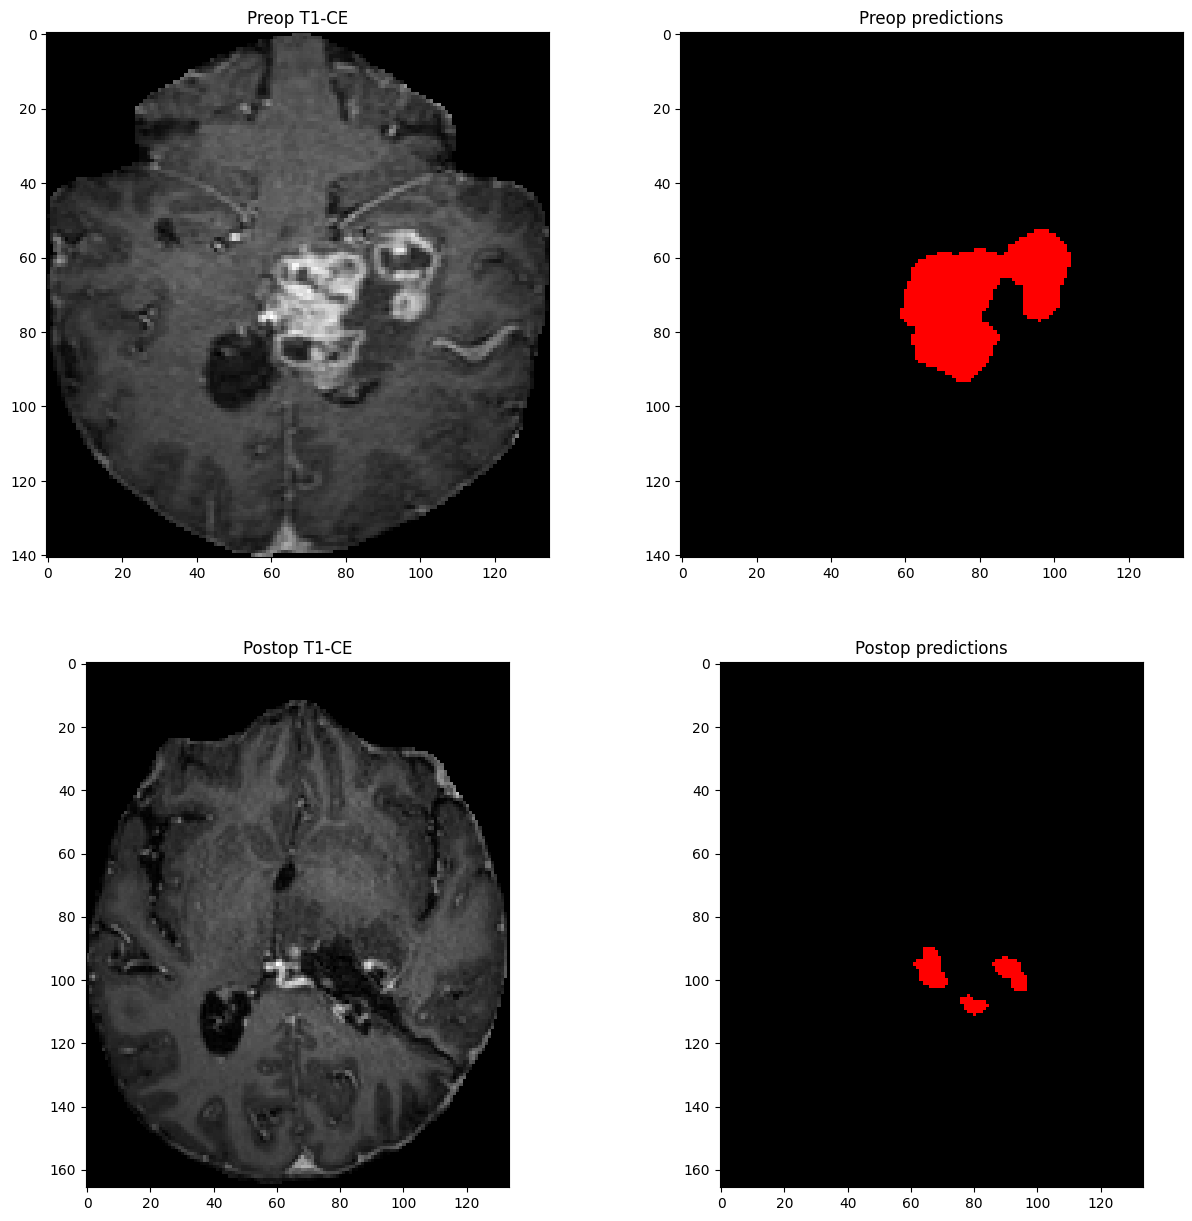

In [26]:
# Inspecting the results
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

logging.getLogger().setLevel(logging.WARNING)

# Loading the results
preop_t1_filename = os.path.join(patient_dir, 'patient-UnitTest2', 'T0', 'preop_t1gd.nii.gz')
postop_t1_filename = os.path.join(patient_dir, 'patient-UnitTest2', 'T1', 'postop_t1gd.nii.gz')
preop_predictions_filename = os.path.join(results_dir, 'T0', 'preop_t1gd_annotation-Tumor.nii.gz')
postop_predictions_filename = os.path.join(results_dir, 'T1', 'postop_t1gd_annotation-Tumor.nii.gz')

preop_t1_nib = nib.load(preop_t1_filename)
postop_t1_nib = nib.load(postop_t1_filename)
preop_pred_nib = nib.load(preop_predictions_filename)
postop_pred_nib = nib.load(postop_predictions_filename)

preop_t1 = preop_t1_nib.get_fdata()[:]
postop_t1 = postop_t1_nib.get_fdata()[:]
preop_pred = preop_pred_nib.get_fdata()[:].astype('uint8')
postop_pred = postop_pred_nib.get_fdata()[:].astype('uint8')

# Plotting corresponding inputs and predictions for a single 2D slice
colors = ['black','green','blue','red']
cmap = matplotlib.colors.ListedColormap(colors)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].imshow(np.fliplr(np.rot90(preop_t1[:, 72, :], k=3)), cmap="gray")
ax[0, 1].imshow(np.fliplr(np.rot90(preop_pred[:, 72, :], k=3)), cmap=cmap)
ax[1, 0].imshow(postop_t1[:, 70, :], cmap="gray")
ax[1, 1].imshow(postop_pred[:, 70, :], cmap=cmap)

for i, title in enumerate(["Preop T1-CE", "Preop predictions", "Postop T1-CE", "Postop predictions"]):
  ax[int(i/2), i%2].set_title(title)
plt.show()